<a href="https://colab.research.google.com/github/afonaya/tric_tic_television/blob/main/%D1%82%D1%80%D1%8B%D1%86_%D1%82%D1%8B%D1%86_%D1%82%D0%B5%D0%BB%D0%B5%D0%B2%D0%B8%D0%B7%D0%BE%D1%80_Vega_Altair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

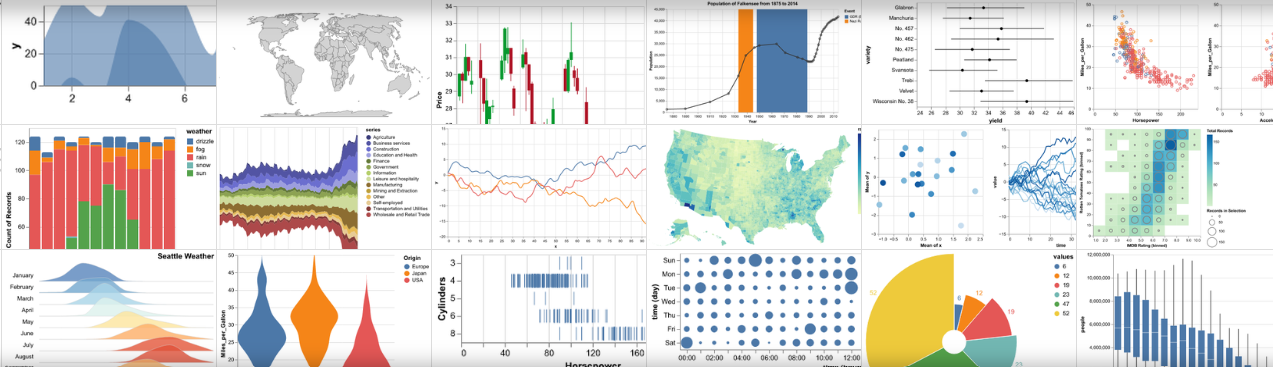

In [ ]:
from IPython.display import Image, display
display(Image('vis.png'))

## Vega-Altair — это декларативная библиотека визуализации для Python. Её простой, дружелюбный и последовательный API, построенный на мощной грамматике Vega-Lite, позволяет вам тратить меньше времени на написание кода и больше времени на изучение данных.

В отличие от matplotlib, например, где вы должны прописывать то вы хотите видеть, где и как, эта библиотека получает информацию о том, что сделать, и сама потом решает как это изобразить.

# Установка


Через pip:

In [ ]:
!pip install altair vega_datasets

Установка через conda:

In [ ]:
!conda install -c conda-forge altair vega_datasets

# Документация и использование


Полная информация о библиотеке: https://altair-viz.github.io/

Для работы с визуализацией нам понадобятся библиотеки:

In [93]:
import altair as alt
import pandas as pd
from vega_datasets import data

## 1. Altair vs Matplotlib

В Python существуют разные способы визуализации данных.

Императивный подход требует описать «КАК» построить график. Он дает больше контроля над каждым шагом отрисовки, но создание графиков. При декларативном подходе требуется описать «ЧТО» визуализировать. Он позволяет больше сосредоточиться на данных.

Императивная библиотека (например, Matplotlib): нужно вручную задавать, как отрисовать каждый элемент графика.
Vega-Altair: нужно объявить связи между столбцами данных и каналами визуального кодирования, такими как ось X, ось Y и цвет. Остальные детали графика обрабатываются автоматически.

Пример императивного подхода (Matplotlib)

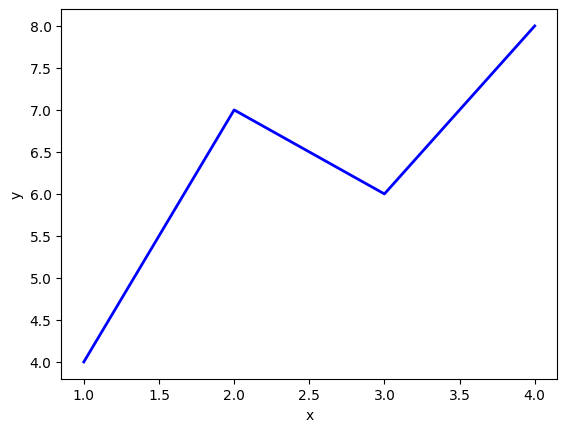

In [98]:
import matplotlib.pyplot as plt

data = {'x': [1, 2, 3, 4], 'y': [4, 7, 6, 8]}

fig, ax = plt.subplots()
# Указываем КАК рисовать: "Нарисуй линию синим, толщиной 2, подпиши оси"
ax.plot(data['x'], data['y'], color='blue', linewidth=2)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

Пример декларативного подхода (Vega-Altair):

In [99]:
data_dict = {'x': [1, 2, 3, 4], 'y': [4, 7, 6, 8]}
data = pd.DataFrame(data_dict)

alt.Chart(data).mark_line().encode(
    x='x',
    y='y'
)

alt.Chart(...)

## 2. Grammar of Graphics

Altair построен на концепции **"Grammar of Graphics"** (Leland Wilkinson).

Grammar of Graphics: создание визуализаций путем разложения их на базовые компоненты (данные, эстетики, координаты и т.д.), позволяя гибко комбинировать их, как слова в языке, для построения практически любых графиков.

**Ключевые идеи:**\
описываем, что хотим видеть, а не как это сделать шаг за шагом.\
Компоненты: график собирается из независимых слоев-компонентов:
*   Данные: Набор данных, который будет визуализирован.
*   Эстетики: Отображение переменных из данных на визуальные атрибуты (цвет, размер, форма, позиция X/Y).
*   Геометрии: Тип графического элемента (точки для scatterplot, линии для line chart, прямоугольники для bar chart).
*   Фасеты: Разделение данных на подгруппы и создание отдельных мини-графиков.
*   Координаты: Система координат (линейная, логарифмическая) и их преобразования.
*   Статистики: Статистические преобразования данных (например, подсчет частоты для гистограммы).
*   Шкалы: Преобразование данных в эстетические значения (например, от числа к цвету).

## 3. Сравнение с другими библиотеками

| Критерий | Vega-Altair | Matplotlib | Plotly | Seaborn |
|----------|-------------|------------|--------|---------|
| Подход | Декларативный| Императивный | Декларативный | Императивный/Декларативный |
| Целева аудитория | Аналитики, исследователи | Разработчики, учёные | Веб-разработчики | Статистики, учёные |
| Интерактивность | Встроенная через Vega | Ограниченная | Высокая | Ограниченная |
|JSON-экспорт| Да (Vega-Lite) | Нет | Да | Нет |

## 4. Путь данных в Altair

Pandas (DataFrame)\
$\downarrow$\
   Altair\
$\downarrow$\
   Vega-Lite (JSON)\
$\downarrow$\
   Vega (JSON)\
$\downarrow$\
   Render (Отрисовка)

1.   **Pandas (Источник данных)**: Данные хранятся в DataFrame. Здесь происходит предварительная обработка данных, чтобы подготовить их к визуализации.
2.   **Altair (Описание графика)**: Altair — это декларативная библиотека, которая позволяет описывать, что хочется видеть (связи между данными и визуальными элементами), а не как это рисовать. Используется Python-код, чтобы определить тип графика, оси, цвета и интерактивные элементы (например, всплывающие подсказки).
3.   **Vega-Lite (Спецификация JSON)**: Altair преобразует декларативный Python-код в JSON-спецификацию по стандарту Vega-Lite (Vega-Lite — это высокоуровневая грамматика для создания интерактивных визуализаций, которая описывает структуру графика в формате JSON).
4.   **Vega (Движок рендеринга)**: Спецификация Vega-Lite передается движку Vega (Vega — это  библиотека для создания интерактивных визуализаций, которая принимает спецификацию Vega-Lite и транслирует её в низкоуровневые инструкции для рисования).
5.   **Render (Отрисовка)**: JavaScript (в браузере или другой среде) выполняет инструкции Vega и отрисовывает финальный график, который видитит пользователь.

**Кратко:** Altair генерирует не пиксели, а JSON-спецификацию в формате Vega-Lite, которую затем может отрисовать браузер или другие инструменты.

# Обзор API: ключевые концепции и объекты

## 1. Введение

Работа с vega-altair - это шиблонные коды, в которые мы должны записывать те или иные данные:

In [10]:
iris = data.iris() #вспомогательные данные
chart = alt.Chart(iris).mark_point().encode(
    x='column_x', # Что на ось X
    y='column_y', # Что на ось Y
    color='category_column' )

Разберем по частям что и для чего:
1. alt. - это модуль Alt, который мы импортируем
2. Chart() - это класс диаграмм, а точнее его конструктор,который создает визуализацию на основе данных
3. .mark_point() - это один из примеров геом.фигур, которые доступны в этой библиотеке.В нашем случае это точки и они будут использоваться как раз для отображения данных
4. .encode() - это метод,который связывает данные с визуальными свойствами, которые дальше указываются в скобках


---



**Рассмотрим подробнее:**

API Vega-Altair работает по принципу цепочек разных методов. Каждая визуализация создается последовательно:

Chart(данные) → .mark_*() → .encode() → .properties() → ... и так далее
Давайте каждое разберем отдельно


## 2. Метод mark_

Методы есть разные, в таблице указаны основные,которые чаще всего используются:

| Метод | Что делает | Использование |
|-------|------------|-------------------|
| `mark_point()` | Рисует точки | Распределение |
| `mark_bar()` | Рисует столбцы | Сравнение |
| `mark_line()` | Рисует линии | Для времени |
| `mark_circle()` | Рисует круги | Как и точки, но с регулированием размера |
| `mark_text()` | Рисует текст | Для подписей |


**Данные Iris:**

150 измерений цветков ириса (по 50 каждого вида)

**Столбцы:**

sepalLength - длина чашелистика (см)

sepalWidth - ширина чашелистика (см)

petalLength - длина лепестка (см)

petalWidth - ширина лепестка (см)

species - вид ириса (setosa, versicolor, virginica)

**1. ТОЧЕЧНЫЙ ГРАФИК**

In [18]:
scatter = alt.Chart(iris).mark_point().encode(
    x='sepalLength:Q',
    y='sepalWidth:Q'
).properties(title='mark_point()', width=200, height=150)

**2. СТОЛБЧАТАЯ ДИАГРАММА**

In [19]:
bar = alt.Chart(iris).mark_bar().encode(
    x='species:N',
    y='mean(petalLength):Q'
).properties(title='mark_bar()', width=200, height=150)

**3. ЛИНЕЙНЫЙ ГРАФИК**



In [20]:
iris_avg = iris.groupby('species').mean().reset_index()
line = alt.Chart(iris_avg).mark_line(point=True).encode(
    x='species:N',
    y='sepalLength:Q'
).properties(title='mark_line()', width=200, height=150)


**Покажем все три вместе**

In [17]:
scatter | bar | line

alt.HConcatChart(...)

Вот так выглядит визуализация данных на примере ирисов, кстати, вот они:

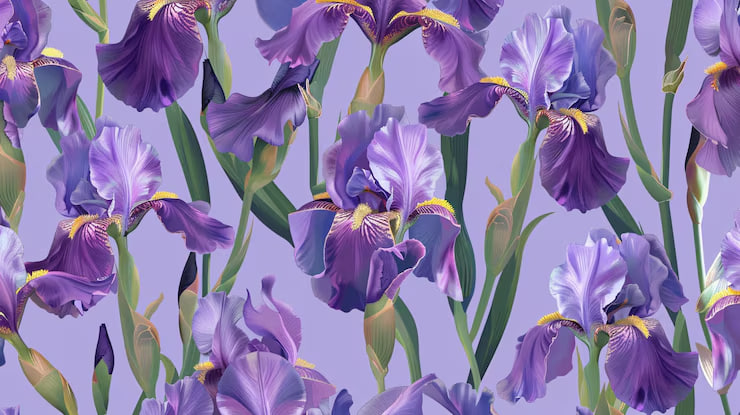

In [23]:
from IPython.display import Image, display
display(Image('цветы.jpg'))

## 3. Кодирование данных (encode)

Основные каналы кодирования:

| Канал | Что делает | Пример |
|-------|------------|-------------------|
| `x, y` | Позиции на осях | x='petalLength:Q' |
| `color` | Цвет | color='...'|
| `size` | Размер марки | size='sepalWidth:Q'|
| `shape` | Форма марки | shape='...'|
| `tooltip` | 	Подсказка при наведении | tooltip=['name', 'value']|
| `opacity` | 	Прозрачность | opacity=alt.value(0.5)|


In [28]:
# график
grafik = alt.Chart(iris).mark_circle().encode(
    x='petalLength:Q',
    y='petalWidth:Q'
).properties(width=150, height=150)

# 4 способа добавить третье измерение:
chart1 = grafik.encode(color='species:N').properties(title='цвет')
chart2 = grafik.encode(size='sepalLength:Q').properties(title='размер')
chart3 = grafik.encode(shape='species:N').properties(title='форма')
chart4 = grafik.encode(opacity='sepalWidth:Q').properties(title='прозрачность')


Выведем наши графики:

In [29]:
(chart1 | chart2) & (chart3 | chart4)

alt.VConcatChart(...)

Обратим внимание, что мы не прописывали легенду, как и размер графиков, но библиотека все красиво оформила

## 4. Типы данных

| Канал | Что делает | Пример |
|-------|------------|-------------------|
| `Quantitative (Количественный) :Q` | Числа | petalLength, Horsepower |
| `Nominal (Номинальный) :N` | Дискретные категории без порядка | species, Origin, country |
| `Ordinal (Порядковый) :O` | Дискретные категории с порядком | size (S, M, L), rating (low, medium, high) |
| `Temporal (Временной) :T` | Даты и время | Year, date, timestamp |
|`GeoJSON (Географический) :G`| Геометрические формы | Координаты для карт |

Как тип данных влияет на визуализацию:

### Влияние типа данных на цветовую шкалу

In [41]:
cars = data.cars()

In [38]:
base = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q'
).properties(width=180, height=150)

In [39]:
quant_chart = base.encode(color='Cylinders:Q').properties(title='Cylinders:Q (Quantitative)')
ord_chart = base.encode(color='Cylinders:O').properties(title='Cylinders:O (Ordinal)')
nom_chart = base.encode(color='Cylinders:N').properties(title='Cylinders:N (Nominal)')

Используем горизонтальную компоновку для сравнения

In [40]:
alt.hconcat(quant_chart, ord_chart, nom_chart)

alt.HConcatChart(...)

Одно и то же числовое поле цилиндров представлено как непрерывная шкала (Q), порядковая (O) и категориальная (N) величина.
Можно увидеть разный вид легенды и цветовой палитры, все это выбрала библиотека :)

### Влияние типа данных на ось X (шкалу)

In [42]:
population = data.population()

In [45]:
base_bar = alt.Chart(population).mark_bar().encode(
    y='people:Q'
).properties(width=180, height=150)

In [46]:
alt.hconcat(
    base_bar.encode(x='year:O').properties(title='year как Ordinal'),
    base_bar.encode(x='year:Q').properties(title='year как Quantitative'),
    base_bar.encode(x='year:T').properties(title='year как Temporal')
)

alt.HConcatChart(...)

Во втором примере видно, как тип данных меняет отображение столбцов на оси X. Разная толщина стобцов, рассотяние между ними, а так же разные расстановки дат на оси X

## 5. Как создавать график? Как выбрать?

Примеры использования

| Что показать | Какой mark использовать |
|-------|------------|
| `Связь двух числовых признаков` | mark_point() или mark_circle() |
| `Сравнение категорий по числу` |  mark_bar() |
| `Изменения по времени` | mark_line() |


**Поэтапное создание графика:**

Загружаем данные для примеров:

In [47]:
cars = data.cars()

Можно сделать гистограмму, например:

In [48]:
histogram = alt.Chart(cars).mark_bar().encode(
    alt.X('Miles_per_Gallon:Q', bin=True),
    y='count()'
).properties(title='1. Гистограмма: распределение расхода топлива',
             width=300, height=200)

In [49]:
histogram

alt.Chart(...)

Как мы говори ранее, можно вставить подсказки, при наведении мышкой (да-да, даже такое есть)

In [61]:
hide = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N',
    tooltip=['Name', 'Horsepower', 'Miles_per_Gallon', 'Origin']
).properties(title='2. График с подсказками (наведите курсор)',
             width=300, height=200)

In [62]:
hide

alt.Chart(...)

Чтобы объединить несколько графиков и сразу их показать, мы использовали знак "|".

Итак, самые базовые вещи мы разобрали, можно ли созранять, что мы сделали?

Конечно)

**КОМАНДЫ ДЛЯ СОХРАНЕНИЯ:**

In [ ]:
chart.save('название.html')     # HTML - можно открыть в браузере
chart.save('название.png')      # PNG - обычное изображение
chart.save('название.svg')      # SVG - векторный формат
chart.save('название.pdf')      # PDF - для печати

# Архитектура

Документация “Altair Internals”: https://altair-viz.github.io/user_guide/internals.html

Немного умных слов: Vega-Altair - это не просто библиотека порисовать, а компилятор декларативных спецификаций. Она превращает Python-код в JSON-спецификации, которые Vega-Lite преобразует в визуализации:

```
Ваш код → Altair → JSON → Vega-Lite → SVG/Canvas → Браузер
    ↓         ↓         ↓         ↓         ↓
Python   Собирает  Отправляет  Рисует   Показывает
         словарь   в браузер   график   вам

```



## 1. Структура репозитория

In [ ]:

"""
altair/
├── __init__.py              # Точка входа, публичный API
├── CHANGELOG.md             # История изменений
├── LICENSE                  # Лицензия BSD-3
├── README.md                # Документация
├── api.py                   # ЯДРО: Класс Chart и фабричные методы (≈ 2000 строк)
├── core.py                  # ЯДРО: Data, Encoding, Marks, Transforms (≈ 2500 строк)
├── expr.py                  # Выражения для вычислений
├── jupyter.py               # Интеграция с Jupyter
├── top_level.py             # Функции верхнего уровня
├── utils/                   # Вспомогательные функции
│   ├── __init__.py
│   ├── core.py             # Утилиты для core
│   ├── data.py             # Обработка данных
│   └── schema.py           # Работа со схемами
├── vegalite/               # Vega-Lite спецификации
│   ├── __init__.py
│   ├── vega*.py            # Генерация спецификаций
│   └── schema/            # JSON схемы
├── examples/               # Примеры использования
└── tests/                  # Тесты (≈ 90% покрытие)
"""

Как много всего, давайте рассмотрим, что для чего и зачем

## 2. Ключевые файлы

| Файл | Назначение | Строк кода | Важность |
|-------|------------|-------------------| --------- |
| api.py | Основной публичный API, класс Chart, метод chaining | ≈ 2000 |⭐⭐⭐⭐⭐|
| core.py | Базовые классы: Data, Encoding, Mark, Transform | ≈ 2500 | ⭐⭐⭐⭐⭐ |
| expr.py | Выражения для вычислений (например, "datum.x * 2") | ≈ 500 | ⭐⭐⭐|
| vegalite/ | Генерация JSON-спецификаций для Vega-Lite | ≈ 1500 | ⭐⭐⭐⭐ |


### Анализ классов

Наследование

In [ ]:
"""
object
├── SchemaBase (класс для всех объектов схемы)
│   ├── Data (данные)
│   ├── MarkDef (определение марки)
│   ├── Encoding (кодировка данных)
│   └── ... другие объекты
│
├── TopLevelMixin (методы верхние)
│   └── Chart (основной класс визуализации)
│       ├── Chart (обычный график)
│       ├── LayerChart (многослойный)
│       ├── HConcatChart (горизонтальная композиция)
│       ├── VConcatChart (вертикальная композиция)
│       └── RepeatChart (повторяющиеся графики)
│
└── Value (обёртка для фиксированных значений)
"""

**Method Chaining**

Ключевой принцип: Каждый метод возвращает **новый** объект, а не изменяет текущий.

Псевдокод упрощенной реализации из api.py:

In [ ]:
class Chart:
    """класс для создания визуализаций"""

-----

    def mark_point(self, **kwargs):
        """Устанавливает марк 'point'"""
        # Создаем объекта, а не изменяем текущий
        copy = self.copy(deep=False)
        copy._spec['mark'] = {'type': 'point', **kwargs}
        return copy  # ← Возвращаем новый объект)

-----

# Пример использования:
chart1 = Chart(data)          # Создаём объект
chart2 = chart1.mark_point()  # Возвращает новый объект chart2
chart3 = chart2.encode(x='x:Q')  # Возвращает и еще новы2й объект chart3


Реальный фрагмент кода из api.py

In [ ]:
def mark_point(self, **kwargs):
    """Set the mark to 'point'"""
    # copy = self.copy() в реальности использует self.copy(deep=False)
    copy = self.copy(deep=['encoding', 'selection'])
    mark = {'type': 'point'}

    # Обработка параметров марки
    if kwargs:
        mark.update(kwargs)

    copy.mark = mark
    return copy

## 3. Как создаются JSON-спецификации для Vega-Lite

**Путь данных в Altair:**

1. Пользователь создаёт цепочку вызовов:
   alt.Chart(data).mark_point().encode(x='sepalLength:Q', y='sepalWidth:Q')
   
2. Altair строит внутреннее представление
```
   {
     'data': {'values': [...]},
     'mark': 'point',
     'encoding': {
       'x': {'field': 'sepalLength', 'type': 'quantitative'},
       'y': {'field': 'sepalWidth', 'type': 'quantitative'}
     }
   }

```

3. Спецификация валидируется против JSON-схемы Vega-Lite
   (в папке altair/vegalite/schema/)
   
4. Спецификация сериализуется в JSON
   
5. В Jupyter: JSON отправляется в Vega-Embed для рендеринга
   В статичном режиме: Vega-Lite компилирует в Vega, затем в SVG/Canvas

**Пример реализации to_dict() и to_json()**

In [72]:
class Chart:
    def to_dict(self, *args, **kwargs):
        # 1. Собираем спецификацию
        dct = self._spec.copy()

        # 2. Добавляем данные
        if self.data is not None:
            dct['data'] = self.data.to_dict()

        # 3. Добавляем трансформации
        if self.transform:
            dct['transform'] = [t.to_dict() for t in self.transform]

        # 4. Добавляем конфигурацию
        if self.config is not None:
            dct['config'] = self.config

        # 5. Валидация через Vega-Lite schema
        self._validate(dct)

        return dct

    def to_json(self, *args, **kwargs):
        """Serialize chart to a JSON string"""
        import json
        dct = self.to_dict(*args, **kwargs)
        return json.dumps(dct, **kwargs)

Давайте посмотрим, что генерирует Altair на самом деле

In [75]:
def safe_get(dct, *keys):
    """Безопасное получение вложенных значений"""
    result = dct
    for key in keys:
        if isinstance(result, dict) and key in result:
            result = result[key]
        else:
            return None
    return result

In [78]:
import json

chart = alt.Chart(iris).mark_point().encode(
    x='sepalLength:Q',
    y='sepalWidth:Q',
    color='species:N'
)

# Получаем словарь спецификации
spec_dict = chart.to_dict()

print("Сгенерированная спецификация")
print("=" * 60)


# Покажем основные части спецификации
summary = {
    'data_type': 'inline' if safe_get(spec_dict, 'data', 'values') else 'named/url',
    'mark_type': safe_get(spec_dict, 'mark', 'type') if isinstance(spec_dict.get('mark'), dict) else spec_dict.get('mark'),
    'encoding_channels': list(spec_dict.get('encoding', {}).keys()),
    'has_transform': 'transform' in spec_dict,
    'schema': spec_dict.get('$schema', 'Не указана')
}

print("обзор спецификации:")
for key, value in summary.items():
    print(f"  {key}: {value}")

print("\n детали кодировки")
x_encoding = spec_dict.get('encoding', {}).get('x')
if x_encoding:
    print(json.dumps(x_encoding, indent=2))

print("\n спецификация:")
# Покажем начало для понимания структуры
full_json = json.dumps(spec_dict, indent=2)
print(f"Первые 500 символов:\n{full_json[:500]}...")
print(f"\nВсего символов: {len(full_json)}")

Сгенерированная спецификация
обзор спецификации:
  data_type: named/url
  mark_type: point
  encoding_channels: ['color', 'x', 'y']
  has_transform: False
  schema: https://vega.github.io/schema/vega-lite/v5.20.1.json

 детали кодировки
{
  "field": "sepalLength",
  "type": "quantitative"
}

 спецификация:
Первые 500 символов:
{
  "config": {
    "view": {
      "continuousWidth": 300,
      "continuousHeight": 300
    }
  },
  "data": {
    "name": "data-5492ad92962bad06c6c3f4c2fd78919a"
  },
  "mark": {
    "type": "point"
  },
  "encoding": {
    "color": {
      "field": "species",
      "type": "nominal"
    },
    "x": {
      "field": "sepalLength",
      "type": "quantitative"
    },
    "y": {
      "field": "sepalWidth",
      "type": "quantitative"
    }
  },
  "$schema": "https://vega.github.io/schema/vega...

Всего символов: 24411


Не обязательно в это вникать и понимать код, мы показали наглядно как это выглядит и что лежит внутри

# Большие примеры

Это примеры со сложными кодами, которые показывают разносторонность библиотеки и ее способности

In [103]:
stocks = data.stocks()
cars = data.cars()
iris = data.iris()
movies = data.movies()
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


Самая классика

In [113]:
def small(chart, title, w=190, h=140):
    return chart.properties(width=w, height=h, title=title)


cars = cars.dropna(subset=["Horsepower", "Miles_per_Gallon", "Origin", "Year"])

# 1) point
c_point = small(
    alt.Chart(cars).mark_point(opacity=0.5).encode(
        x="Horsepower:Q", y="Miles_per_Gallon:Q", color="Origin:N",
        tooltip=["Name:N", "Origin:N", "Horsepower:Q", "Miles_per_Gallon:Q"]
    ),
    "mark_point()"
)

# 2) circle
c_circle = small(
    alt.Chart(cars).mark_circle(opacity=0.5).encode(
        x="Horsepower:Q", y="Miles_per_Gallon:Q", color="Origin:N"
    ),
    "mark_circle()"
)

# 3) square
c_square = small(
    alt.Chart(cars).mark_square(opacity=0.5).encode(
        x="Horsepower:Q", y="Miles_per_Gallon:Q", color="Origin:N"
    ),
    "mark_square()"
)

# 4) tick
c_tick = small(
    alt.Chart(cars).mark_tick().encode(
        x="Miles_per_Gallon:Q", y="Origin:N", color="Origin:N"
    ),
    "mark_tick()"
)

# 5) bar (агрегат)
c_bar = small(
    alt.Chart(cars).mark_bar().encode(
        y=alt.Y("Origin:N", sort="-x"),
        x="mean(Miles_per_Gallon):Q",
        color="Origin:N"
    ),
    "mark_bar()"
)

# 6) rect (heatmap по бинам)
c_rect = small(
    alt.Chart(cars).mark_rect().encode(
        x=alt.X("Horsepower:Q", bin=alt.Bin(maxbins=12)),
        y=alt.Y("Miles_per_Gallon:Q", bin=alt.Bin(maxbins=12)),
        color="count():Q"
    ),
    "mark_rect()"
)

# 7) line
c_line = small(
    alt.Chart(cars).mark_line().encode(
        x="Year:T", y="mean(Miles_per_Gallon):Q", color="Origin:N"
    ),
    "mark_line()"
)

# 8) area
c_area = small(
    alt.Chart(cars).mark_area(opacity=0.6).encode(
        x="Year:T", y="mean(Miles_per_Gallon):Q", color="Origin:N"
    ),
    "mark_area()"
)

# 9) arc (pie)
c_arc = small(
    alt.Chart(cars).mark_arc().encode(
        theta="count():Q",
        color="Origin:N",
        tooltip=["Origin:N", "count():Q"]
    ),
    "mark_arc()"
)

gallery = alt.vconcat(
    alt.hconcat(c_point, c_circle, c_square, c_tick),
    alt.hconcat(c_bar, c_rect),
    alt.hconcat(c_line, c_area, c_arc),
)

gallery

alt.VConcatChart(...)

In [114]:
chart = alt.Chart(cars).mark_circle(size=50, opacity=0.7).encode(
    alt.X('Horsepower', title='Лошадиные силы'),
    alt.Y('Miles_per_Gallon', title='Мили на галлон'),
    color='Origin',
    tooltip=['Name', 'Origin', 'Miles_per_Gallon', 'Horsepower']
).properties(title='Интерактивный точечный график',
             width=400,
             height=400).interactive()
final_chart = chart.configure_title(
    fontSize=16
).configure_axis(
    titleFontSize=12
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
)
final_chart

alt.Chart(...)

 теперь всевозможные bar charts

In [115]:
data = pd.DataFrame({
    'city': ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Йошкар-Ола'],
    'temperature': [22, 19, 15, 17, 20],
    'average': [18, 16, 12, 14, 16]
})

base = alt.Chart(data).encode(
    alt.X('city:N',
          sort='-y',
          axis=alt.Axis(title='Город'))
)

bars = base.mark_bar(
    width=35
).encode(
    alt.Y('temperature:Q',
          axis=alt.Axis(title='Температура (C)'),
          scale=alt.Scale(domain=[0, 25]))
).properties(
    width=alt.Step(40)
)

ticks = base.mark_tick(
    color='red',
    thickness=3,
    size=35
).encode(
    y='average:Q'
)
labels = base.mark_text(
    baseline='bottom',
    dy=-5,
).encode(
    y='temperature:Q',
    text='temperature:Q'
)

chart = (bars + ticks + labels).properties(
    title='Текущая температура vs средняя за 5 лет',
    width=400,
    height=300
)

final_chart = chart.configure_title(
    fontSize=16
).configure_axis(
    titleFontSize=12
)
final_chart

alt.LayerChart(...)

А следующая будет работать с наведением мышки и высвечиванием основной информации

In [116]:
def get_rating(rating):
    if rating >= 8.0:
        return "Лучший"
    elif rating >= 7.0:
        return "Ну нормально"
    elif rating >= 5.0:
        return "Средненько"
    elif rating >= 3.0:
        return "Кринж"
    else:
        return "Полный треш"

filtered_movies = movies.dropna(subset=['Major_Genre', 'IMDB_Rating'])
filtered_movies = filtered_movies[filtered_movies['Major_Genre'] != '']

filtered_movies['rating_category'] = filtered_movies['IMDB_Rating'].apply(get_rating)

top_genres = filtered_movies['Major_Genre'].value_counts().head(6).index.tolist()
filtered_movies = filtered_movies[filtered_movies['Major_Genre'].isin(top_genres)]

data = []
rating_categories = ["Полный треш", "Кринж", "Средненько", "Ну нормально", "Лучший"]

for genre in top_genres:
    genre_movies = filtered_movies[filtered_movies['Major_Genre'] == genre]
    for el in rating_categories:
        count = len(genre_movies[genre_movies['rating_category'] == el])
        if count > 0:
            data.append({
                'question': genre,
                'type': el,
                'value': count
            })

source = pd.DataFrame(data)

source["type_rate"] = source["type"].map({
    "Полный треш": -2,
    "Кринж": -1,
    "Средненько": 0,
    "Ну нормально": 1,
    "Лучший": 2,
})

def calc_percentages(group):
    group = group.set_index("type_rate").sort_index()
    perc = (group["value"] / group["value"].sum()) * 100
    group["percentage"] = perc
    group["percentage_end"] = perc.cumsum() - (perc[-2] + perc[-1] + perc[0] / 2)
    group["percentage_start"] = group["percentage_end"] - perc
    return group

source = source.groupby("question", group_keys=False).apply(calc_percentages)
color_scale = alt.Scale(
    domain=["Полный треш", "Кринж", "Средненько", "Ну нормально", "Лучший"],
    range=["#c30d24", "#f3a583", "#cccccc", "#94c6da", "#1770ab"],
)

y_axis = alt.Axis(title="Жанр фильма", offset=5, ticks=False, minExtent=60, domain=False)

chart = alt.Chart(source).mark_bar().encode(
    x=alt.X("percentage_start:Q", title="Распределение %"),
    x2="percentage_end:Q",
    y=alt.Y("question:N").axis(y_axis),
    color=alt.Color("type:N").title("Категория рейтинга").scale(color_scale),
    tooltip=[
        alt.Tooltip("question:N", title="Жанр"),
        alt.Tooltip("type:N", title="Рейтинг"),
        alt.Tooltip("value:Q", title="Количество фильмов"),
        alt.Tooltip("percentage:Q", title="Процент", format=".1f")
    ]
).properties(
    title="Распределение IMDb по жанрам фильмов",
    width=600,
    height=300
).configure_title(
    fontSize=16
)

final_chart = chart.configure_title(
    fontSize=16
).configure_axis(
    titleFontSize=12
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
)
final_chart

/tmp/ipython-input-4186441368.py:53: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  source = source.groupby("question", group_keys=False).apply(calc_percentages)


alt.Chart(...)

Просто столбчатая диаграмма

In [117]:
data = cars.groupby(['Year', 'Origin']).size().reset_index(name='count')
data['order'] = data['Origin'].apply(lambda x: 0 if x == 'USA' else 1)
alt.Chart(data).mark_bar(opacity=0.6).encode(
    x='Year:O',
    y=alt.Y('count:Q').stack(None),
    color="Origin",
    order=alt.Order('order:Q', sort='ascending')
).properties(
    title='Количество автомобилей по годам и стране происхождения',
    width=500,
    height=300
)
final_chart = chart.configure_title(
    fontSize=16
).configure_axis(
    titleFontSize=12
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
)
final_chart

alt.Chart(...)

Интерактивная столчатая диаграмма. Зеленые столбцы обозначают рост стоимости, красные - падение.

In [118]:
stocks = stocks.sort_values(['symbol', 'date'])
stocks['price_change'] = stocks.groupby('symbol')['price'].diff()
aapl_data = stocks[stocks['symbol'] == 'AAPL'].dropna()
predicate = alt.datum.price_change > 0
color = alt.when(predicate).then(alt.value("green")).otherwise(alt.value("red"))
chart = alt.Chart(aapl_data).mark_bar().encode(
    x="date:T",
    y="price_change:Q",
    color=color,
    tooltip=["date:T", "price:Q", "price_change:Q"]
).properties(
    title="Изменение цены акций Apple",
    width=600,
    height=300
)
final_chart = chart.configure_title(
    fontSize=16
).configure_axis(
    titleFontSize=12
)
final_chart

alt.Chart(...)

Линейный график с ростом

In [119]:

x = np.linspace(0, 10, 300)
y = np.sin(x) + 0.4 * x - 1.2
df = pd.DataFrame({
    "x": x,
    "y": y
})

f = alt.Chart(df).mark_line(size=2.5).encode(
    x=alt.X("x", title="Время"),
    y=alt.Y("y", title="Значение")
)

arrow = alt.layer(
    alt.Chart().mark_line(size=3, color="green").encode(
        x=alt.datum(4.1),
        y=alt.datum(-0.3),
        x2=alt.datum(5.8),
        y2=alt.datum(1.1)
    ),
    alt.Chart().mark_point(
        shape="triangle",
        filled=True,
        size=180,
        color="green"
    ).encode(
        x=alt.datum(5.8),
        y=alt.datum(1.1),
        angle=alt.AngleValue(35)
    ),
    alt.Chart().mark_text(
        size=14,
        align="center",
        baseline="bottom",
        color="green"
    ).encode(
        x=alt.datum(5.0),
        y=alt.datum(1.4),
        text=alt.datum("рост")
    )
)

chart = (
    f + arrow
).properties(
    width=500,
    height=400,
    title="f(x) с участком роста"
)

final_chart = chart.configure_title(
    fontSize=16
).configure_axis(
    titleFontSize=12
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
)
final_chart



alt.LayerChart(...)

График - бублик с разными радиусами

In [120]:
source = cars.groupby('Origin').size().reset_index(name='count')
base = alt.Chart(source).encode(
    alt.Theta("count:Q").stack(True),
    alt.Radius("count").scale(type="sqrt", zero=True, rangeMin=20),
    color="Origin:N",
)

c1 = base.mark_arc(innerRadius=20, stroke="white")
c2 = base.mark_text(radiusOffset=10).encode(text="count:Q")

chart = (c1 + c2).properties(
    width=400,
    height=300,
    title="Кол-во машин в странах"
)
final_chart = chart.configure_title(
    fontSize=16
).configure_axis(
    titleFontSize=12
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
)
final_chart

alt.LayerChart(...)

Круговая диаграмма в полярных координатах

In [121]:
import math
source = pd.DataFrame({
    "hour": range(24),
    "sales": [2, 1, 0, 0, 1, 3, 5, 8, 12, 15, 18, 20, 22, 21, 19, 17, 15, 13, 10, 8, 6, 4, 3, 2]
})

polar_bars = alt.Chart(source).mark_arc(stroke='white', tooltip=True).encode(
    theta=alt.Theta("hour:O"),
    radius=alt.Radius('sales').scale(type='linear'),
    radius2=alt.datum(1),
)
axis_rings = alt.Chart(pd.DataFrame({"ring": range(5, 25, 5)})).mark_arc(stroke='lightgrey', fill=None).encode(
    theta=alt.value(2 * math.pi),
    radius=alt.Radius('ring').stack(False)
)
axis_rings_labels = axis_rings.mark_text(color='grey', radiusOffset=5, align='left').encode(
    text="ring",
    theta=alt.value(math.pi / 4)
)

axis_lines = alt.Chart(pd.DataFrame({
    "radius": 25,
    "theta": math.pi / 2,
    'hour': ['00:00', '06:00', '12:00', '18:00']
})).mark_arc(stroke='lightgrey', fill=None).encode(
    theta=alt.Theta('theta').stack(True),
    radius=alt.Radius('radius'),
    radius2=alt.datum(1),
)
axis_lines_labels = axis_lines.mark_text(
        color='grey',
        radiusOffset=5,
        thetaOffset=-math.pi / 4,
        align=alt.expr('datum.hour == "18:00" ? "right" : datum.hour == "06:00" ? "left" : "center"'),
        baseline=alt.expr('datum.hour == "00:00" ? "bottom" : datum.hour == "12:00" ? "top" : "middle"'),
    ).encode(text="hour")

chart = alt.layer(
    axis_rings,
    polar_bars,
    axis_rings_labels,
    axis_lines,
    axis_lines_labels,
    title=['Продажи автомобилей в течение дня', '']
)
final_chart = chart.configure_title(
    fontSize=16
).configure_axis(
    titleFontSize=12
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
)
final_chart

alt.LayerChart(...)

Линейный график с доверительным интервалом. Зеленая линия показывает средние значения, светлая область показывает неопределенность данных.

In [122]:
source = cars
line = alt.Chart(source).mark_line(
    color='darkgreen',
    strokeWidth=2
).encode(
    x='Year:O',
    y='mean(Miles_per_Gallon):Q'
)

band = alt.Chart(source).mark_errorband(
    extent='ci',
    color='lightgreen',
    opacity=0.4
).encode(
    x='Year:O',
    y=alt.Y('Miles_per_Gallon:Q').title('Мили на галлон'),
)

chart = (band + line).properties(
    title='Расход топлива по годам',
    width=700,
    height=400
)
final_chart = chart.configure_title(
    fontSize=16
).configure_axis(
    titleFontSize=12
)
final_chart

alt.LayerChart(...)

Двумерная тепловая карта, показывающая совместное распределение

In [123]:
source = iris

chart = alt.Chart(source).mark_rect().encode(
    alt.X('sepalLength:Q')
        .bin(maxbins=20)
        .axis(title='Длина чашелистика'),
    alt.Y('sepalWidth:Q')
        .bin(maxbins=15)
        .axis(title='Ширина чашелистика'),
    alt.Color('count():Q')
        .scale(scheme='viridis')
        .legend(title='Кол-во цветков'),
).properties(
    title='Тепловая карта распределения ирисов',
    width=500,
    height=400
)

final_chart = chart.configure_title(
    fontSize=16
).configure_axis(
    titleFontSize=12
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
)
final_chart

alt.Chart(...)

График с детализированным просмотром

In [126]:
import altair as alt
import datetime as dt
from vega_datasets import data

stocks_df = data.stocks()
stocks_df['date'] = pd.to_datetime(stocks_df['date'])
stocks_2005 = stocks_df[stocks_df['date'] >= '2005-01-01']

companies = ['AAPL', 'GOOG', 'MSFT']
source = stocks_2005[stocks_2005['symbol'].isin(companies)]

date_range = (dt.date(2006, 1, 1), dt.date(2007, 12, 31))

brush = alt.selection_interval(encodings=['x'],
                               value={'x': date_range})

base = alt.Chart(source, width=600, height=200).mark_area(
    opacity=0.4,
    line=True
).encode(
    x = 'date:T',
    y = 'price:Q',
    color = 'symbol:N'
)

upper = base.encode(
    alt.X('date:T').scale(domain=brush)
)
lower = base.properties(
    height=60
).add_params(brush)

upper & lower

alt.VConcatChart(...)

График, где мы проводим по линии и нам показываются конкретные значения в сравнении в разных странах

In [127]:
cars_by_year = cars.groupby(['Year', 'Origin']).agg({'Miles_per_Gallon': 'mean'}).reset_index()

label = alt.selection_single(
    encodings=['x'],
    on='mouseover',
    nearest=True,
    empty='none'
)

base = alt.Chart().mark_line(point=True).encode(
    alt.X('Year:O'),
    alt.Y('mean(Miles_per_Gallon):Q'),
    alt.Color('Origin:N')
)

chart = alt.layer(
    base,
    alt.Chart().mark_rule(color='#aaa', strokeWidth=1).encode(
        x='Year:O'
    ).transform_filter(label),
    base.mark_circle(size=80).encode(
        opacity=alt.condition(label, alt.value(1), alt.value(0))
    ).add_selection(label),

    base.mark_text(align='left', dx=5, dy=-5, stroke='white', strokeWidth=2).encode(
        text='mean(Miles_per_Gallon):Q'
    ).transform_filter(label),
    base.mark_text(align='left', dx=5, dy=-5).encode(
        text='mean(Miles_per_Gallon):Q'
    ).transform_filter(label),
    data=cars_by_year
).properties(
    title='Средний расход топлива по годам и странам',
    width=700,
    height=400
)
final_chart = chart.configure_title(
    fontSize=16
).configure_axis(
    titleFontSize=12
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
)
final_chart

/tmp/ipython-input-1939176043.py:3: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use selection_point instead.
  label = alt.selection_single(
/tmp/ipython-input-1939176043.py:23: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).add_selection(label),


alt.LayerChart(...)

График - карта

In [128]:

from vega_datasets import data
states = alt.topo_feature(data.us_10m.url, 'states')

np.random.seed(42)
state_ids = list(range(1, 57))
population_data = pd.DataFrame({
    'id': state_ids,
    'population': np.random.randint(1000000, 10000000, len(state_ids))
})
chart = alt.Chart(states).mark_geoshape(
    stroke='white',
    strokeWidth=0.5
).encode(
    color=alt.Color('population:Q',
                   scale=alt.Scale(scheme='blues'),
                   legend=alt.Legend(title='Население'))
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(population_data, 'id', ['population'])
).project(
    type='albersUsa'
).properties(
    title='Население штатов США (данные сами придумали)',
    width=600,
    height=400
)
final_chart = chart.configure_title(
    fontSize=16
).configure_axis(
    titleFontSize=12
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
)
final_chart

alt.Chart(...)